In [22]:
%matplotlib inline

In [23]:
import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt
import sympy as smp
import seaborn as sns

from IPython.display import YouTubeVideo

In [24]:
from IPython.display import Image
from IPython.core.display import HTML 
#Image(url= "https://upload.wikimedia.org/wikipedia/commons/f/f9/Electron_shell_029_Copper.svg", width=400)

In [25]:
#import sys
#sys.path.append('D:\Dropbox\python\ipython-circuitikz')
%install_ext circuitikz.py

Installed circuitikz.py. To use it, type:
  %load_ext circuitikz


/home/henk/anaconda3/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


In [26]:
%reload_ext circuitikz

--------

# Electrische circuits DC: Week 2

-----

## Inhoud:

- Chapter 2: Voltage, Current, Resistance
- Chapter 3: Ohm's Law
- Chapter 4: Energy and Power
- Chapter 5: Series Circuits
- Chapter 6: Parallel Circuits
- Chapter 7: Series-Parallel Circuits
- Chapter 8: Circuit theorem and Conversions
- Chatper 12: Capacitors
- Chapter 13: Inductors

# RECAP  LAST WEEK

- Opbouw atoom (koper atoom)
- Geleiding in een atoomrooster
- Lading, Stroom, Spanning
- Wet van Ohm
- Circuit opbouw 
    - elementen (spanningsbron, stroombron, weerstand)
    - polariteit
    - stroomrichtingen
- Rekenen aan een circuit via de wet van Ohm (bekende/onbekende methode)
    - oplossen van een onbekende

## Circuit vorige week

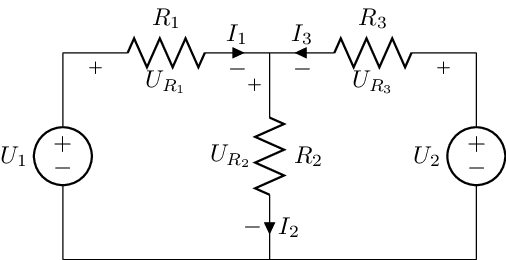

In [6]:
%%circuitikz filename=circuit4 dpi=175 options=american folder=circuits/college1/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[V,v=$U_1$] (0,3) 
      to[R, l^=$R_1$, v_=$U_{R_1}$, i=$I_1$] (3,3)
      to [R, l=$R_2$, v=$U_{R_2}$, i=$I_2$] (3,0)
      to[short] (0,0) 
      
      (3,0) 
      to[short] (6,0)
      to[V, v=$U_2$] (6,3)
      to[R, l_=$R_3$, v^=$U_{R_3}$, i_=$I_3$] (3,3)
      ;
\end{circuitikz}

Neem aan dat:
- $U_1$ = $4~V$
- $U_2$ = $12~V$
- $R_1$ = $8~\Omega$
- $R_2$ = $4~\Omega$
- $R_3$ = $5~\Omega$

1. Bereken de stroom $I_2$: -> $I_2 = 1+\frac{6}{23}~[A]$
2. Bereken de spanning $U_{R_3}$ -> $U_{R_3} = 5+\frac{1}{23}~[V]$

## TOETS

Graag inloggen via socrative, room = HKO09

[Socrative](www.socrative.org)

-----

# Vandaag:

- Hoofdstuk 4, 5 en 6

- Weerstanden
- Energie en vermogen 
- Serie en Parallel schakelingen
- Wetten van Kirchhoff

-----

### Weerstandswaarden (de E reeks)

Logaritmische schaal:

- E6: 10-15-22-33-47-68 (20% toleratie)
- E12: 10-12-15-18-22-27-33-39-47-56-68-82 (10% toleratie)
- E96: ...


Wordt bepaals in stappen (i) van: n^d machts wordtel uit 10:

0:  1.000000
1:  1.211528
2:  1.467799
3:  1.778279
4:  2.154435
5:  2.610157
6:  3.162278
7:  3.831187
8:  4.641589
9:  5.623413
10:  6.812921
11:  8.254042
12:  10.000000


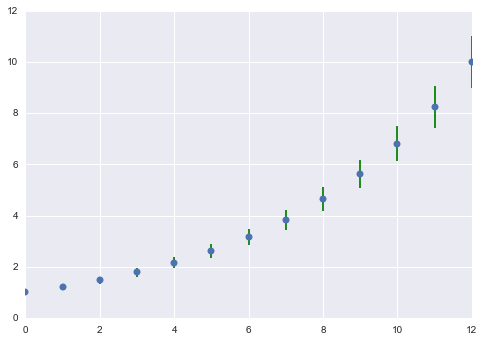

In [7]:
# Voorbeeld E12: 12e machts wortel uit 10

N = np.arange(13)
E12 = np.zeros(13)
for i in N:
    E12[i] = 10**(i/12)
    print('{0:1d}:  {1:2f}'.format(i,E12[i]))
     
plt.plot(N,E12,'b*')
plt.errorbar(N,E12,yerr=0.1*E12,fmt='o', ecolor='g')
plt.show()

# Chapter 4: Energy and Power (p. 106)

opgaven: 3,4, 5, 7, 10, 12, 15, 19, 23, 30, 31, 35, 37, 39

## 4.1 Energy and power (p. 27)

[Sparkfun: Electric power](https://learn.sparkfun.com/tutorials/electric-power)

### Power:
Vermogen is gedefineerd als de verandering in Energie [Joule] in de Tijd [Seconde]:

$$
P[W] = \dfrac{d E~[J]}{d t~[s]}
$$


In een electrisch circuit geldt:

$$
P [W]=U [V] \cdot I [A],\hspace{1cm} P = \dfrac{U^2}{R} ,\hspace{1cm} P = I^2 \cdot R
$$

## 4.2 - 4.5 Power/ Energy in circuits (p. 106)

Energie uitgedrukt in Joules [J] of kiloWattuur [kWh]:

Zie met behulp van de vermogensformule, dat in het geval van een constant vermogen (d.w.z geen verandering over tijdsduur T) geldt: 

$$
E = \int^T_0{P \cdot dt}
$$

$$
E~[J] = P~[W] \cdot T~[s]
$$


Dus de eenheid van energie (Joule~[J]) komt overeen met $W \cdot s$. 

Dit kunnen we weer omschrijven naar:

$
1000 \cdot W \cdot s  = 1~[kWs]
$

$
3600 \cdot k \cdot W \cdot s = 1~[kWh]
$

dus:

$
1~[kWh] = 1000 \cdot 3600  = 3.6\cdot10^6~[J]
$

Vermogen gaat __KWADRATISCH__ met de opgelegde spanning danwel stroom die loopt:

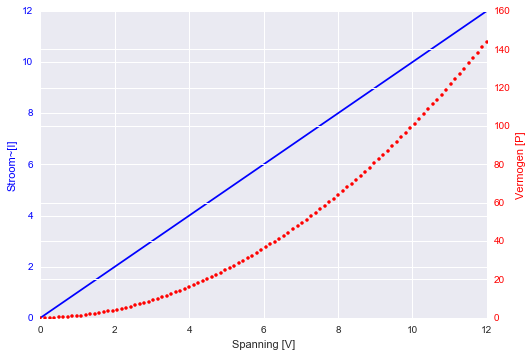

In [82]:
def plotUICurve(R=1):
    if R == 0:
        R = 1e-10
    U = np.linspace(0,12,100)
    I = U/R
    P = I**2/R
    
    fig, ax1 = plt.subplots()
    ax1.plot(U, I, 'b-')
    ax1.set_xlabel('Spanning [V]')
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('Stroom~[I]', color='b')
    for tl in ax1.get_yticklabels():
        tl.set_color('b')


    ax2 = ax1.twinx()
    ax2.plot(U, P, 'r.')
    ax2.set_ylabel('Vermogen [P]', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.show()
    
    
plotUICurve(R=1)

___

Weerstanden zijn beschikbaar in verschillende vermogensmaten. Gangbare metaalfilmweerstanden zijn te krijgen in:
- 1W
- 1/2W
- 1/4W
- 1/8W

## Oefenopgaves:

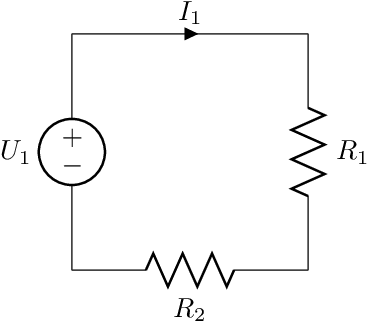

In [83]:
%%circuitikz filename=circuit1 dpi=200 options=american folder=circuits/college2/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[V,v=$U_1$] (0,3) 
      to[short, i = $I_1$] (3,3)
      to [R, l=$R_1$] (3,0)
      to [R, l=$R_2$] (0,0) 
\end{circuitikz}

Bereken het geleverde vermogen door $U_1$ als het opgenomen/gedissipeerde vermogen van $R_1$ 27~W blijkt te zijn. 

Gegeven zijn verder:

- $R_1=3~\Omega$
- $R_2=1.5~\Omega$

Welke vermogensklasse (1/8,1/4,1/2,1 Watt) moet ik pakken voor $R_1$ indien: 
    
- $U_1 = 40~V$
- $R_1=1~k~\Omega$
- $R_2=2k2~\Omega$

In [18]:
((40/(1e3+2.2e3))**2)*1e3

0.15625000000000003

Dus een weerstand van meer dan 0.125W geeft 0.25W

-----

De efficiente van een vermogensbrond wordt bepaald door het quotient van ingangs en ingangsvermogen:

$$Efficientie [\%]= \dfrac{P_{out}}{P_{in}} \cdot 100 $$

AmpereUur [Ah] betekend het gemiddeld aantal ampere dat een bron (bijvoorbeeld accu of batterij) 1 uur lang kan leveren.
    
Stel een batterij is gedefineerd als 44Ah. Voor hoeveel uur kan het dan 0.5~[A] leveren?

$44 = A \cdot h$

$44 = 0.5 \cdot h$

$h = 88$

-----

# Chapter 5 / 6: Series + Parallel Circuits

opgaven: 7(d), 11, 14, 19, 22, 24, 25, 29, 31, 32, 34, 35, 37, 43, 47, 49

Weerstanden in serie:

$$R_{tot,serie} = \sum_{i=1}^N R_i$$

Weerstanden parallel:

$$R_{tot,parallel} = \dfrac{1}{\sum_{i=1}^N \left( \dfrac{1}{R_i} \right) } $$

Wanneer je dit uitwerkt zul je zien dat **de totale weerstand is gelijk aan het product van de weerstanden gedeelt door de som van de weerstanden**

Dit wordt vaak genoteerd (in het geval van twee weerstanden) als:

$$ R_1~||~R_2 = \frac{R_1 R_2}{R_1+R_2}$$


## Spanningsdeler / Stroomdeler

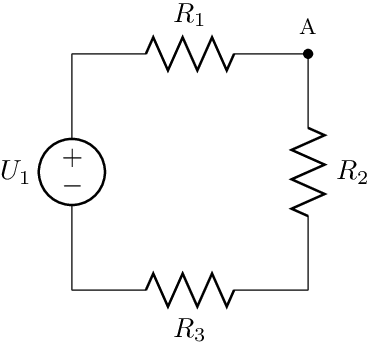

In [92]:
%%circuitikz filename=circuit2 dpi=200 options=american folder=circuits/college2/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[V,v=$U_1$] (0,3) 
      to[R, l=$R_1$,-*] (3,3) node[label={[font=\footnotesize]above:A}] {}
  
      to[R, l=$R_2$] (3,0) 
      to[R, l=$R_3$] (0,0) 
\end{circuitikz}

## Oefenopgave:

1. Bereken de spanning over $R_1, R_2, R_3$
2. Bereken de spanning op punt A

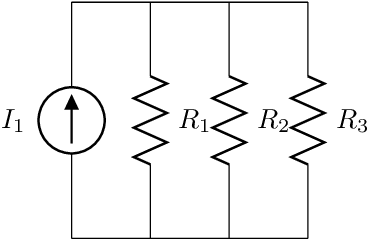

In [93]:
%%circuitikz filename=circuit3 dpi=200 options=american folder=circuits/college2/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[I,I=$I_1$] (0,3) 
      to[short] (3,3)
      to [R, l=$R_3$] (3,0)
      to [short] (0,0);  
    
      \draw (1,3) to[R, l=$R_1$] (1,0); 
      \draw (2,3) to[R, l=$R_2$] (2,0); 
\end{circuitikz}

## Oefenopgave (thuis):

1. Bereken de stroom door $R_1$, $R_2$, $R_3$

------

# METHODE 2: De wetten van Kirchhoff

- [Khan Academy](https://www.khanacademy.org/science/physics/circuits-topic)
- [engineeringvideos.org](http://www.engineeringvideos.org/circuit-analysis)

### Kirchhoff's stroom wet (Kirchhoff Current Law --> KCL):

De som van de M stromen op een knooppunt (NODE) is gelijk aan **0**:

###  $$I_{tot} = \sum_{k=1}^M I_k=0$$

In [3]:
YouTubeVideo("QbTr25UTR7s", start=0, autoplay=0, theme="light", color="red")

### Kirchhoff's spanning wet (Kirchhoff Voltange Law --> KVL):

De som van de N spanning in een lus (Mesh) is gelijk aan **0**:

### $$U_{tot} = \sum_{l=1}^N U_l=0$$

In [4]:
YouTubeVideo("JOGygS0AvQE", start=0, autoplay=0, theme="light", color="red")

## Kirchhoff stappen:
 
>1. Neem het circuit over op papier
2. Iedere weerstand heeft zijn eigen stroom en spanning (richting en polariteit horen bij elkaar)
3. Bepaal het aantal relevante knooppunten en lussen
4. Stel de vergelijkingen op
5. Bereken de gewenste onbekend(en)
6. Controleer je antwoord

## Gezamenlijke opgave:

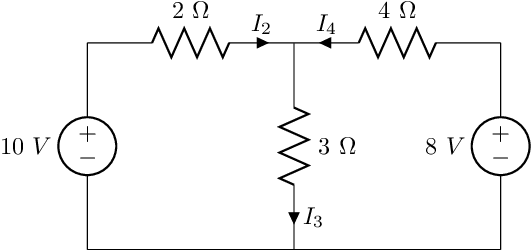

In [69]:
%%circuitikz filename=circuit4 dpi=175 options=american folder=circuits/college2/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[V,v=$10~V$] (0,3) 
      to[R, l^=$2~\Omega$, i=$I_2$, v=$I_2$, -*] (3,3) node[label={above:$K_1$}] {}
      to [R, l=$3~\Omega$, i=$I_3$, v=$I_3$] (3,0)
      to[short] (0,0) 
      
      (3,0) 
      to[short] (6,0)
      to[V, v_=$8~V$] (6,3)
      to[R, l_=$4~\Omega$, i_=$I_4$, v^=$I_4$] (3,3)
      ;
    
      \draw[thin, <-, >=triangle 45] (1.5,1.5)node{$L_1$}  ++(-60:.75) arc (-60:170:.75);
      \draw[thin, <-, >=triangle 45] (4.5,1.5)node{$L_2$}  ++(-60:.75) arc (-60:170:.75);
    
\end{circuitikz}

Bepaal de stroom $I_3$ met behulp van de wetten van Kirchhoff.

# Dus volgens de procedure:

1. Overnemen van het schema
2. Zet de polariteiten en stromen goed:
    ![polariteiten en stroomrichtingen](circuits/college2/circuit4Full.png)
3. Bepaal de relevante knooppunten en lussen:
    ![relevante knooppunten en lussen](circuits/college2/circuit4Full2.png)
    Dus de relevante knooppunten zijn $K_1$ en relevante lussen zijn $L_1$ en $L_2$
4. Geef de knooppunt en lusvergelijkingen:
    \begin{align}
    K_1 \rightarrow & I_2 + I_4 - I_3 = 0 \\
    L_1 \rightarrow & 2 \cdot I_2 + 3 \cdot I_3 - 10 = 0 \\
    L_2 \rightarrow & 4 \cdot I_4 + 3 \cdot I_3 - 8 = 0
    \end{align}
5. Los op voor de onbekende (gevraagde) variabele
    \begin{align}
    I_3&=I_2+I_4 \\
    & = \frac{10-3I_3}{2}+\frac{8-3I_3}{4}
    \end{align}

    GEEFT:

    $$
    4I_3 = 20-6I_3+8-3I_3
    $$

    $$
    I_3(4+9) = 28
    $$

    $$
    I_3 = \frac{28}{13} = 2+\frac{2}{13}
    $$

5. Controle (mogelijkheden):
    - Kijk of het realistisch is (spanning over $R_3$ wordt $6+6/13~A$) dit kan kloppen. In elke geval kan het niet meer dan $10~V$ zijn !
    - Vul de waarde van I_3 ergens in en los op voor de andere onbekenden

## En nu zelf:

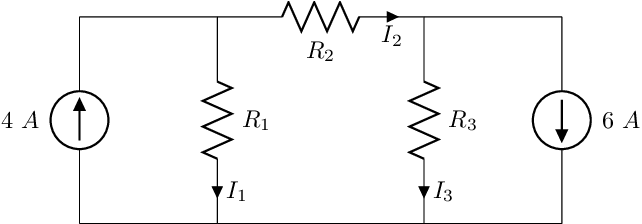

In [79]:
%%circuitikz filename=circuit5 dpi=175 options=american folder=circuits/college2/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[I,i=$4~A$] (0,3) 
      to[short] (2,3)
      to [R, l=$R_1$, i=$I_1$] (2,0)
      to[short] (0,0); 
      
      \draw (2,3) 
      to [R, l_=$R_2$, i_=$I_2$] (5,3)
      to [R, l=$R_3$, i=$I_3$] (5,0);
    
      \draw (5,3)
      to[short] (7,3)
      to[I,i=$6~A$] (7,0)
      to[short] (2,0);
\end{circuitikz}

Neem verder aan dat:

- $R_1$ = $R_2$ = $R_3$ = 2 $\Omega$

## Oefenopgave:

Bereken de stroom $I_1$, $I_2$ en $I_3$

## Extra links:

- [Wikiversity: Electric Circuit](https://en.wikiversity.org/wiki/Electric_Circuit_Analysis)
- [Pearson Floyd](https://media.pearsoncmg.com/bc/abp/floyd/)

--------------------

# $SUCCES = (Voorbereiding \cdot Geluk)^{Motivatie}$